In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import json

plt.style.use('classic')

mmaxstr = 'M_{max}'


def to_scientific_latex(number):
    """
    Převede číslo na LaTeXový vědecký formát.é

    Args:
    number (int or float): Číslo k převedení.

    Returns:
    str: Číslo ve formátu LaTeX $10^x$.
    """
    if number == 0:
        return "$0$"

    exponent = int(np.floor(np.log10(abs(number))))
    base = number / (10 ** exponent)

    # Případ, kdy základ je 10, což znamená že číslo je přesně 10^exponent
    if base == 10:
        return f"$10^{{{exponent + 1}}}$"

    # Zobrazíme jako celé číslo, pokud je základ celočíselně roven samotnému základu
    if base == int(base):
        base = int(base)

    # Když základ je 1, zobrazujeme pouze mocninu desítky
    if base == 1:
        return f"$10^{{{exponent}}}$"
    else:
        return f"${{ {base} \\times 10^{{{exponent}}} }}$"


data = {
    'Label': ['1k', '10k', '1m', '25k', '2m'],
    'Value1': [100, 200, 300, 400, 500],
    'Value2': [10, 20, 30, 40, 50],
    'Value3': [0.1, 0.2, 0.3, 0.4, 0.5],
    'Value4': [0.01, 0.02, 0.03, 0.04, 0.05]
}
df = pd.DataFrame(data)


# Funkce pro transformaci Label sloupce
def transform_label(label):
    label = str(label)
    if label.endswith('k'):
        return int(label[:-1]) * 1000
    elif label.endswith('m'):
        return int(label[:-1]) * 1000000
    else:
        return int(label)  # Pro případ, že label je už v čistě číselné formě


# Aplikace transformace


# Cesta k souboru
file_path = 'knn_FINAL.txt'

# Načtení dat
df = pd.read_csv(file_path, sep=r'\s+', header=None, names=[
    "name", " tested_point_number", "test_number ", "kn_size", "m_max", "accuracy", "avg_err",
    "err_case_float"
])

df['name'] = df['name'].apply(transform_label)

# Zobrazení prvních několika řádků dat
df

,name,tested_point_number,test_number,kn_size,m_max,accuracy,avg_err,err_case_float
0,100,0,15,8,8,0.00,0.000000,0
1,100,1,15,8,8,0.75,215333.080840,6
2,100,2,15,8,8,0.00,0.000000,6
3,100,3,15,8,8,0.50,63639.214922,10
4,100,4,15,8,8,0.00,0.000000,10
...,...,...,...,...,...,...,...,...
14204655,100,428,15,32,32,0.00,0.000000,0
14204656,100,429,15,32,32,0.00,0.000000,0
14204657,100,430,15,32,32,0.00,0.000000,0
14204658,100,431,15,32,32,0.00,0.000000,0


In [15]:
df['accuracy'] = 1 - df['accuracy']

In [16]:
df_by_name = df.groupby("name").mean().reset_index()
df_by_name

,name,tested_point_number,test_number,kn_size,m_max,accuracy,avg_err,err_case_float
0,100,499.468663,24.458598,43.166410,85.432386,0.829380,128744.007751,11437.701252
1,1000,499.500000,24.500000,234.666667,85.714286,0.875331,43908.698496,31498.542182
2,10000,499.500000,24.500000,234.666667,85.714286,0.584616,113696.931625,232452.978787
3,100000,499.500000,24.547550,234.666667,85.072046,0.454051,87972.732474,249859.723397
4,1000000,499.500000,24.416667,234.666667,85.714286,0.326261,53388.666211,305889.995466


In [17]:
df_by_name_knn = df.groupby(["name", "kn_size"]).mean().reset_index()
df_by_name_knn

,name,kn_size,tested_point_number,test_number,m_max,accuracy,avg_err,err_case_float
0,100,8,499.500000,24.446023,85.363636,0.880632,94972.395716,4.790579e+02
1,100,16,499.500000,24.446023,85.363636,0.880197,99522.150702,1.905287e+03
2,100,32,499.144464,24.459675,85.440761,0.818075,135510.454747,5.785531e+03
3,100,64,499.500000,24.472934,85.515670,0.772880,170620.011285,1.598866e+04
4,100,96,499.699016,24.468403,85.478586,0.794859,143258.063386,3.308591e+04
5,1000,8,499.500000,24.500000,85.714286,0.891534,25120.687850,4.379899e+02
6,1000,16,499.500000,24.500000,85.714286,0.774054,60555.661232,2.706632e+03
7,1000,32,499.500000,24.500000,85.714286,0.739298,74186.500976,8.702069e+03
8,1000,64,499.500000,24.500000,85.714286,0.584985,178677.586340,2.627275e+04
9,1000,96,499.500000,24.500000,85.714286,0.888110,56637.850070,4.482848e+04


In [18]:
df_by_name_mmax = df.groupby(["name", "m_max"]).mean().reset_index()
df_by_name_mmax

,name,m_max,tested_point_number,test_number,kn_size,accuracy,avg_err,err_case_float
0,100,8,499.779364,24.493620,43.235458,0.808865,140670.019803,12223.140785
1,100,16,499.500000,24.313725,43.200000,0.811641,138531.323726,12021.202051
2,100,32,499.005062,24.406239,42.931039,0.829851,128231.427813,11415.781981
3,100,64,499.500000,24.500000,43.200000,0.838917,123394.157928,11097.951152
4,100,96,499.500000,24.500000,43.200000,0.838917,123394.157928,11097.951152
5,100,128,499.500000,24.500000,43.200000,0.838917,123394.157928,11097.951152
6,100,256,499.500000,24.500000,43.200000,0.838917,123394.157928,11097.951152
7,1000,8,499.500000,24.500000,234.666667,0.835476,57160.361661,38633.295716
8,1000,16,499.500000,24.500000,234.666667,0.835434,57175.090079,38636.138660
9,1000,32,499.500000,24.500000,234.666667,0.837308,56642.871063,38508.614638


In [19]:
df_by_name_knn_mmax = df.groupby(["name", "kn_size", "m_max"]).mean().reset_index()
df_by_name_knn_mmax

,name,kn_size,m_max,tested_point_number,test_number,accuracy,avg_err,err_case_float
0,100,8,8,499.5,24.500000,0.786765,149729.412295,8.623739e+02
1,100,8,16,499.5,24.313725,0.786713,149427.855897,8.625927e+02
2,100,8,32,499.5,24.313725,0.886135,91622.407293,4.555947e+02
3,100,8,64,499.5,24.500000,0.926645,68251.246272,2.914107e+02
4,100,8,96,499.5,24.500000,0.926645,68251.246272,2.914107e+02
...,...,...,...,...,...,...,...,...
282,1000000,1000,32,499.5,24.416667,0.071204,166767.489536,1.361534e+06
283,1000000,1000,64,499.5,24.416667,0.071204,166767.489536,1.360429e+06
284,1000000,1000,96,499.5,24.416667,0.071204,166767.489536,1.360404e+06
285,1000000,1000,128,499.5,24.416667,0.071204,166767.489536,1.351616e+06


Text(0.5, 0, '$M_{max}$')

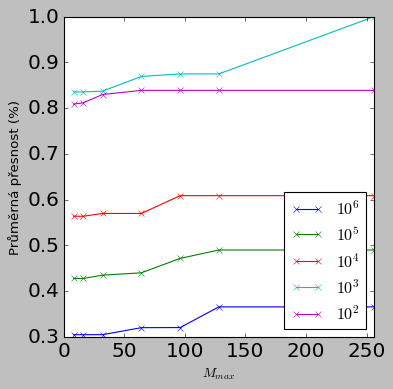

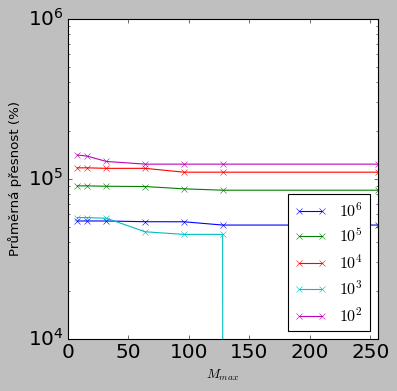

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))

m_max_values = sorted(df_by_name_mmax['name'].unique(), reverse=True)
for i in m_max_values:
    tmp_df = df_by_name_mmax.loc[df_by_name_mmax['name'] == i]
    if not tmp_df.empty:
        ax.plot(tmp_df['m_max'], tmp_df['accuracy'], '-x', label=f"{to_scientific_latex(i)}")

ax.legend(loc='lower right')

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax.set_ylabel('Průměrná přesnost (%)')
ax.set_xlabel(f'${mmaxstr}$')
ax.set_xlim([0, 256])

fig, ax2 = plt.subplots(figsize=(5, 5))

m_max_values = sorted(df_by_name_mmax['name'].unique(), reverse=True)
for i in m_max_values:
    tmp_df = df_by_name_mmax.loc[df_by_name_mmax['name'] == i]
    if not tmp_df.empty:
        ax2.plot(tmp_df['m_max'], tmp_df['avg_err'], '-x', label=f"{to_scientific_latex(i)}")

ax2.legend(loc='lower right')
ax2.set_yscale('log')
ax2.set_xlim([0, 256])

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax2.set_ylabel('Průměrná přesnost (%)')
ax2.set_xlabel(f'${mmaxstr}$')

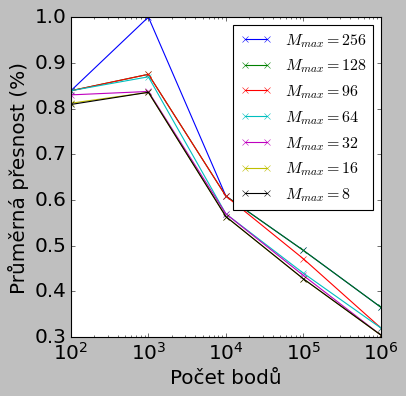

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))

m_max_values = sorted(df_by_name_mmax['m_max'].unique(), reverse=True)
for i in m_max_values:
    tmp_df = df_by_name_mmax.loc[df_by_name_mmax['m_max'] == i]
    if not tmp_df.empty:
        ax.plot(tmp_df['name'], tmp_df['accuracy'], '-x', label=f"${mmaxstr}= {i}$")

ax.set_xscale('log')
ax.legend(loc="upper right"
          , ncol=1)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax.set_ylabel('Průměrná přesnost (%)', fontsize=18)
ax.set_xlabel(f'Počet bodů', fontsize=18)

plt.savefig('benchmark_knn_acc.pdf', bbox_inches='tight')


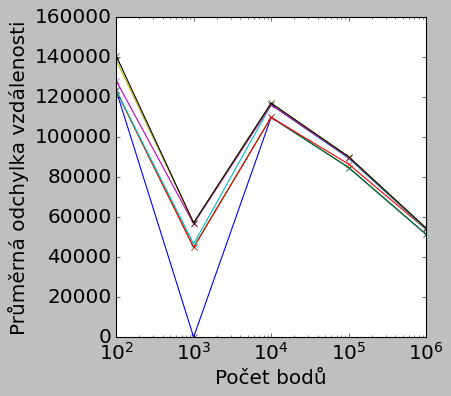

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))

m_max_values = sorted(df_by_name_mmax['m_max'].unique(), reverse=True)
for i in m_max_values:
    tmp_df = df_by_name_mmax.loc[df_by_name_mmax['m_max'] == i]
    if not tmp_df.empty:
        ax.plot(tmp_df['name'], tmp_df['avg_err'], '-x', label=f"${mmaxstr}= {i}$")

ax.set_xscale('log')
ax.set_xscale('log')
# ax.legend(loc="upper right"
, ncol=1)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax.set_ylabel('Průměrná odchylka vzdálenosti', fontsize=18)
ax.set_xlabel(f'${mmaxstr}$', fontsize=18)
ax.set_xlabel(f'Počet bodů', fontsize=18)

plt.savefig('benchmark_knn_acc_err.pdf', bbox_inches='tight')


In [23]:
df["kn_size"].unique()

df_by_name_mmax_knn = df.groupby(["name", "m_max", "kn_size"]).mean().reset_index()
df_by_name_mmax_knn

,name,m_max,kn_size,tested_point_number,test_number,accuracy,avg_err,err_case_float
0,100,8,8,499.500000,24.500000,0.786765,149729.412295,8.623739e+02
1,100,8,16,499.500000,24.500000,0.873214,103161.588491,2.711106e+03
2,100,8,32,499.500000,24.500000,0.817299,136088.116457,6.656451e+03
3,100,8,64,499.500000,24.500000,0.772232,171107.497031,1.688060e+04
4,100,8,96,500.893079,24.468187,0.794864,143254.799882,3.393223e+04
...,...,...,...,...,...,...,...,...
282,1000000,256,96,499.500000,24.416667,0.240705,42821.857767,1.002245e+05
283,1000000,256,128,499.500000,24.416667,0.187463,57502.360146,1.887175e+05
284,1000000,256,256,499.500000,24.416667,0.218407,50156.191457,3.412115e+05
285,1000000,256,512,499.500000,24.416667,0.130508,93035.735090,6.642429e+05


In [24]:
tmp_df = df_by_name_mmax_knn.loc[df_by_name_mmax_knn['m_max'] == df_by_name_mmax_knn['kn_size']]
tmp_df

,name,m_max,kn_size,tested_point_number,test_number,accuracy,avg_err,err_case_float
0,100,8,8,499.500000,24.500000,0.786765,149729.412295,862.373880
6,100,16,16,499.500000,24.313725,0.875700,101138.812246,2691.809686
12,100,32,32,497.024994,24.407431,0.819080,134762.057808,5822.418046
18,100,64,64,499.500000,24.500000,0.772232,171107.497031,15585.203740
24,100,96,96,499.500000,24.500000,0.794175,143736.136009,32746.565620
35,1000,8,8,499.500000,24.500000,0.802763,47768.964944,798.667060
45,1000,16,16,499.500000,24.500000,0.635576,105515.341246,4553.483000
55,1000,32,32,499.500000,24.500000,0.695658,86629.487502,12202.068620
65,1000,64,64,499.500000,24.500000,0.515816,208457.184063,28944.841740
75,1000,96,96,499.500000,24.500000,0.869462,66077.491748,49940.660300


Text(0.5, 0, 'Počet bodů')

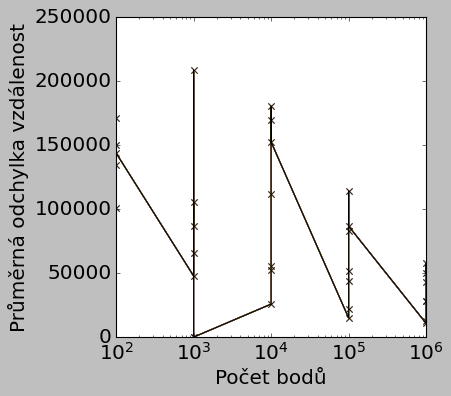

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))

m_max_values = sorted(df_by_name_mmax_knn['m_max'].unique(), reverse=True)



for i in m_max_values:
    tmp_df = df_by_name_mmax_knn.loc[df_by_name_mmax_knn['m_max'] == df_by_name_mmax_knn['kn_size']]
    if not tmp_df.empty:
        ax.plot(tmp_df['name'], tmp_df['avg_err'], '-x', label=f"${mmaxstr}= {i}$")

ax.set_xscale('log')
ax.set_xscale('log')
# ax.legend(loc="upper right"
, ncol=1)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax.set_ylabel('Průměrná odchylka vzdálenost', fontsize=18)
ax.set_xlabel(f'${mmaxstr}$', fontsize=18)
ax.set_xlabel(f'Počet bodů', fontsize=18)

